<a href="https://colab.research.google.com/github/electropavuk/nn/blob/master/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №8
#### з дисципліни "Нейронні мережі"
#### студента групи КН-31/2
#### Мауріна Андрія
#### Варіант №4

# Додаткове завдання Q-learning

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

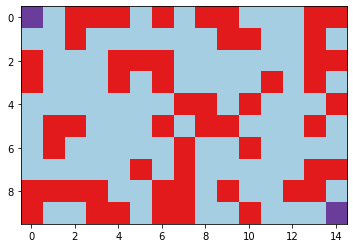

In [ ]:
def display(solution=None):
    EMPTY = 0
    PATH = 50
    BLOCK = 120
    POS = 200

    img = []
    for i in range(len(field)):
        img.append([])
        for j in range(len(field[0])):
            if (i, j) in (start, target):
                clr = POS
            elif solution and (i, j) in solution:
                clr = PATH
            elif field[i][j]:
                clr = BLOCK
            else:
                clr = EMPTY
            img[-1].append(clr)

    img = np.array(img)
    plt.imshow(img, cmap='Paired', vmax=255)


m, n = 10, 15
block_prob = .2
field = np.random.uniform(low=0, high=1, size=(m, n)) < block_prob
start = 0, 0
target = m - 1, n - 1
field[start] = field[target] = 0

display()

In [ ]:
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
k = len(actions)

def update(state, act):
    (i, j), (di, dj) = state, actions[act]
    ni, nj = i + di, j + dj
    if not (0 <= ni < m and 0 <= nj < n):
        next_sate = state
    elif field[ni][nj]:
        next_sate = state
    else: # move legal
        next_sate = ni, nj
    return next_sate, 999 if next_sate == target else 0

def make_decision(state, epsilon=.1):
    if random.random() < epsilon: # explore (random move)
        return random.randint(0, k - 1)
    else: # exploit (best move)
        i, j = state
        best = [act for act in range(k) if Q[i, j, act] == Q[i, j].max()]
        return random.choice(best)

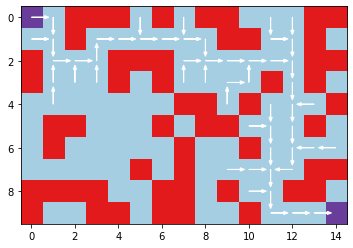

In [ ]:
Q = np.zeros((m, n, k))
trials = 10000
discount = .9
alpha = .99

for i in range(trials):
    state = start
    while state != target:
        i, j = state
        act = make_decision(state, epsilon=.05)
        next_sate, reward = update(state, act)
        Q[i, j, act] = (1 - alpha) * Q[i, j, act] + alpha * (reward + discount * max(Q[next_sate]))
        state = next_sate


best_actions = np.argmax(Q, axis=-1)
arrow_length = .8
arrows = [[actions[a] for a in row] for row in best_actions]

for i, row in enumerate(arrows):
    for j, (di, dj) in enumerate(row):
        if not field[i][j] and any(Q[i][j].tolist()):
            plt.arrow(j, i, arrow_length * dj, arrow_length * di, 
                        length_includes_head=True,
                        head_width=0.15, 
                        head_length=0.2,
                        color='white')
display()

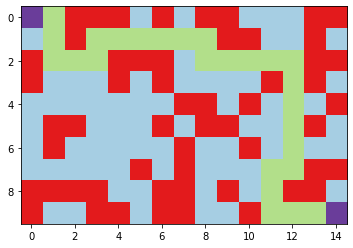

In [ ]:
state, solution = start, []
while state != target:
    i, j = state
    state, reward = update(state, np.argmax(Q[i, j]))
    solution.append(state)

display(solution)

# Висновок

Для демонстрації роботи алгоритму Q-learning я вирішив задачу пошуку найкоротшого шляху в лабіринті. При цьому агент не мав інформацію про розташування перешкод, а взаємодіяв і навчався лише на власному досвіді.